# Machine Learning Final (Section I)

## Required Libraries

In [51]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Utilize Z-score for data scaling
from sklearn.preprocessing import StandardScaler

# Clustering Algorithms
from sklearn.cluster import KMeans

# PCA - TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering

# Sillhouette Score
from sklearn.metrics import silhouette_score

# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Read the dataset (#1 - CO2 Levels)

In [52]:
data = pd.read_csv('global.csv')
data.head(100)

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN
...,...,...,...,...,...,...,...,...
95,1846,43,0,0,43,0,0,NaN
96,1847,46,0,0,46,0,0,NaN
97,1848,47,0,0,47,0,0,NaN
98,1849,50,0,0,50,0,0,NaN


## Printing the information

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         260 non-null    int64  
 1   Total        260 non-null    int64  
 2   Gas Fuel     260 non-null    int64  
 3   Liquid Fuel  260 non-null    int64  
 4   Solid Fuel   260 non-null    int64  
 5   Cement       260 non-null    int64  
 6   Gas Flaring  260 non-null    int64  
 7   Per Capita   61 non-null     float64
dtypes: float64(1), int64(7)
memory usage: 16.4 KB


Observations:

- There are 260 observations and 8 columns
- Columns 0-7 have 260 non-null values i.e. there are no missing values in the data.
- Column 8 has missing values for 199 data points.

In [54]:
# Checking unique values in each column
data.nunique()

Year           260
Total          190
Gas Fuel        94
Liquid Fuel    121
Solid Fuel     188
Cement          68
Gas Flaring     47
Per Capita      37
dtype: int64

In [55]:
# Creating numerical columns
num_cols = ['Total', 'Gas Fuel', 'Liquid Fuel', 'Solid Fuel','Cement', 'Gas Flaring', 'Per Capita']

# Creating categorical columns
cat_cols = ['Year']

In [56]:
# Checking summary statistics
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Total,260.0,1402.788462,2253.098527,3.00,12.75,239.50,1385.00,9167.00
Gas Fuel,260.0,185.200000,396.585560,0.00,0.00,0.00,59.50,1702.00
Liquid Fuel,260.0,495.819231,934.308074,0.00,0.00,3.00,279.25,3122.00
Solid Fuel,260.0,674.569231,868.368580,3.00,12.75,236.00,1023.50,3842.00
Cement,260.0,34.161538,78.899604,0.00,0.00,0.00,12.00,450.00
Gas Flaring,260.0,13.065385,26.311315,0.00,0.00,0.00,0.00,110.00
Per Capita,61.0,1.054754,0.178630,0.64,0.94,1.12,1.17,1.33


In [57]:
data[cat_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Year,260.0,1880.5,75.199734,1751.0,1815.75,1880.5,1945.25,2010.0


Observations:

- The Year variable has a high range from 1751 to 2010 which indicates a wide array of years being accounted for regarding CO2 levels.
- Average gas fuel is around 185 which is equivalent to .185 metric tons of CO2 emissions per year.
- Average liquid fuel is around 495 which is equivalent to .495 metric tons of CO2 emissions per year.
- Average solid fuel is around 674 which is equivalent to .674 metric tons of CO2 emissions per year. 

## Histogram Distributions

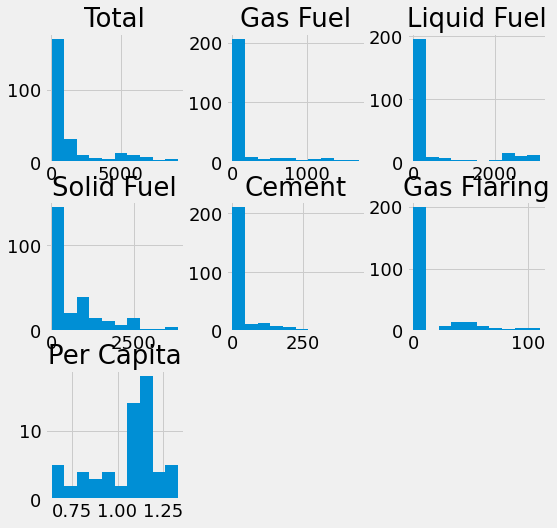

In [58]:
#creating histograms
data[num_cols].hist(figsize=(8,8))
plt.show()

Observations:

- The year distribution is a perfect uniform distribution due to it accounting for year as a singular value. 
- The total, gas fuel, liquid fuel, solid fuel, cement, and gas flaring are heavily skewed to the right, which means CO2 emissions are close to zero for several years before fossil fuels are utilized more frequently. 
- The per capita is skewed to the left, indicating that majority of CO2 emissions and per capita are a 1:1 ratio.

## Checking the relationship between different numerical variables

<AxesSubplot:>

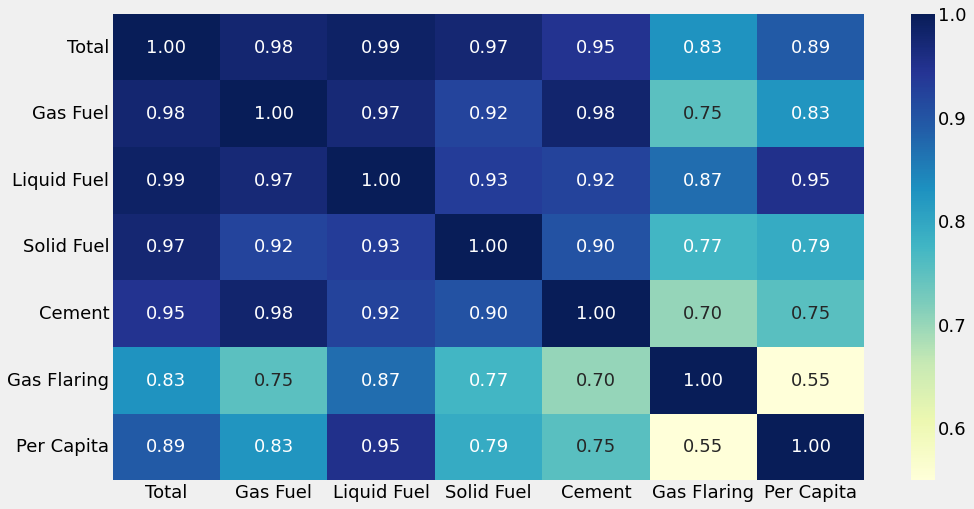

In [59]:
#plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(data[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

Observations:

- We can see extremely high positive correlation among following variables:
    1. Gas Fuel and Total
    2. Liquid Fuel and Total
    3. Solid Fuel and Total
    4. Cement and Total
    5. Gas Fuel and Cement
    6. Gas Fuel and Solid Fuel
    7. Gas Fuel and Liquid Fuel

Conclusion: 

    The prevalence of CO2 levels did not arise until much later years in this dataset so the overall averages for all 
    variables are quite skewed due to the years with no presence of fossil fuel usage by humans. 

## Read the dataset (#2 - Covid Numbers)

In [60]:
data = pd.read_csv('covid.csv')
data.head(50)

,Country/Other,Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population
0,Albania,220,260,-15.0,77,0,0,0,0.0,2871809
1,Andorra,322,416,-23.0,4155,0,0,0,0.0,77501
2,Austria,15057,20033,-25.0,1654,52,296,-82,6.0,9104348
3,Belgium,4160,16285,-74.0,356,17,54,-69,1.0,11685761
4,Bosnia and Herzegovina,143,166,-14.0,44,2,4,-50,0.6,3241935
5,Bulgaria,1279,1714,-25.0,187,39,47,-17,6.0,6848786
6,Channel Islands,423,492,-14.0,2391,0,3,-100,0.0,176918
7,Croatia,2184,2777,-21.0,538,16,26,-38,4.0,4057029
8,Czechia,1545,2194,-30.0,144,9,11,-18,0.8,10746847
9,Denmark,3199,3634,-12.0,549,28,37,-24,5.0,5831079


## Checking info of the data:

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country/Other                     42 non-null     object 
 1   Cases in the last 7 days          42 non-null     int64  
 2   Cases in the preceding 7 days     42 non-null     int64  
 3   Weekly Case % Change              42 non-null     float64
 4   Cases in the last 7 days/1M pop   42 non-null     int64  
 5   Deaths in the last 7 days         42 non-null     int64  
 6   Deaths in the preceding 7 days    42 non-null     int64  
 7   Weekly Death % Change             42 non-null     int64  
 8   Deaths in the last 7 days/1M pop  42 non-null     float64
 9   Population                        42 non-null     int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 3.4+ KB


Observations:
    
    - There are 42 observations and 10 columns in the data.
    - All columns have 42 non-null values i.e. there are no missing values.
    - All columns except Country/other are numerical.

In [62]:
# Check duplicate entries
data[data.duplicated()]

,Country/Other,Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population


- There are no duplicate rows in the data. 

## Summary Statistics

In [63]:
data.describe()

,Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,4.200000e+01
mean,17167.380952,23084.095238,-22.369048,1016.261905,79.714286,115.595238,-32.214286,3.180952,1.733632e+07
std,42899.327970,59160.041768,24.539431,1092.485822,162.499874,215.884913,44.863770,4.083712,2.948741e+07
min,0.000000,60.000000,-100.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,3.367200e+04
25%,442.500000,593.000000,-26.750000,214.250000,0.000000,5.000000,-53.750000,0.000000,1.904725e+06
50%,1412.000000,2099.000000,-19.500000,557.500000,9.000000,15.000000,-30.500000,1.500000,5.529584e+06
75%,5961.500000,8246.500000,-9.000000,1727.500000,42.000000,59.250000,-6.250000,4.750000,1.145103e+07
max,206666.000000,293964.000000,36.000000,4336.000000,603.000000,731.000000,100.000000,21.000000,1.460537e+08


Observations: 

    - The average cases in the last 7 days is 17,167 but the minimum value is just 0 cases.
    - The average cases in the preceding 7 days is 23,084 but the minimum value is 60 cases.
    - The average deaths in the last 7 days is 1,016 but the minimum value is 0 deaths.

## Checking the distrubtion and outliers for each column in the data

Cases in the last 7 days
Skew : 3.24


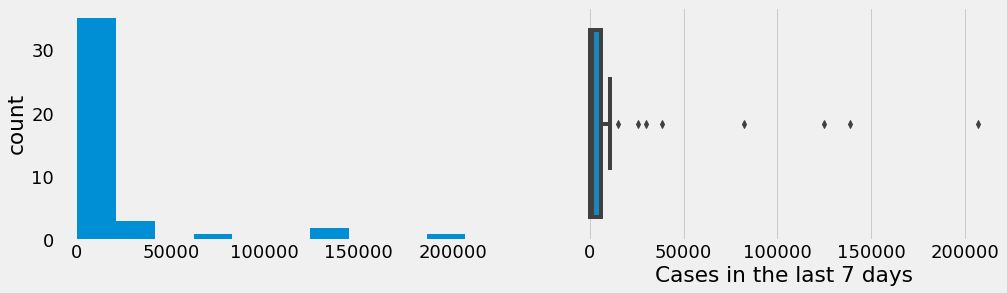

Cases in the preceding 7 days
Skew : 3.41


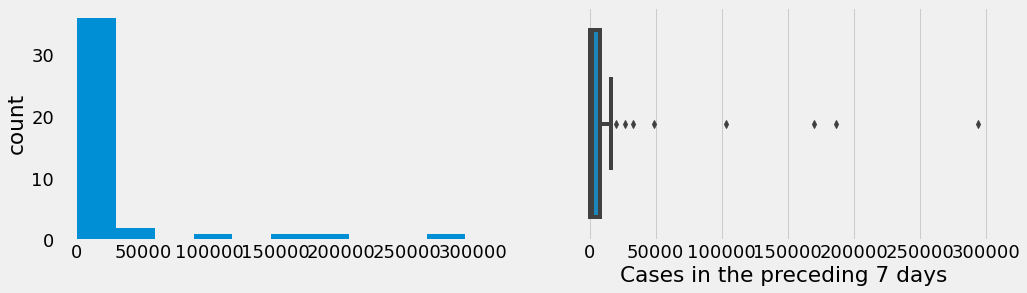

Weekly Case % Change
Skew : -1.2


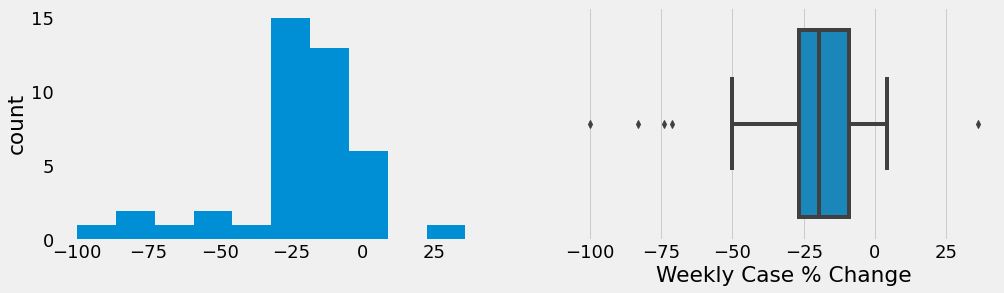

Cases in the last 7 days/1M pop
Skew : 1.43


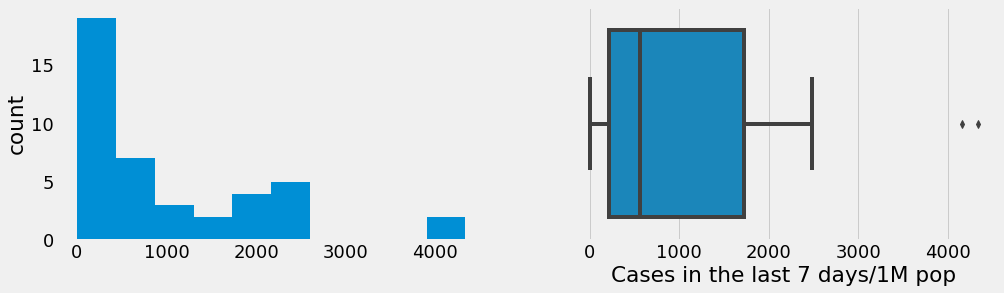

Deaths in the last 7 days
Skew : 2.32


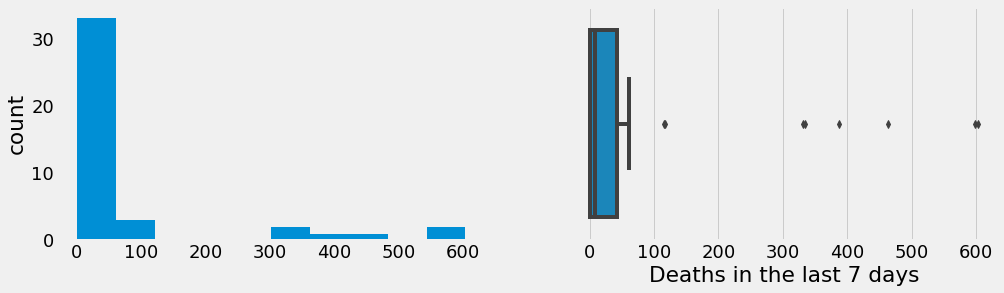

Deaths in the preceding 7 days
Skew : 2.07


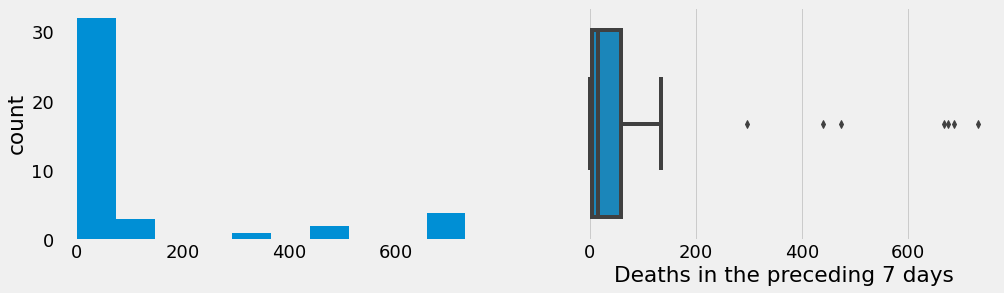

Weekly Death % Change
Skew : 0.35


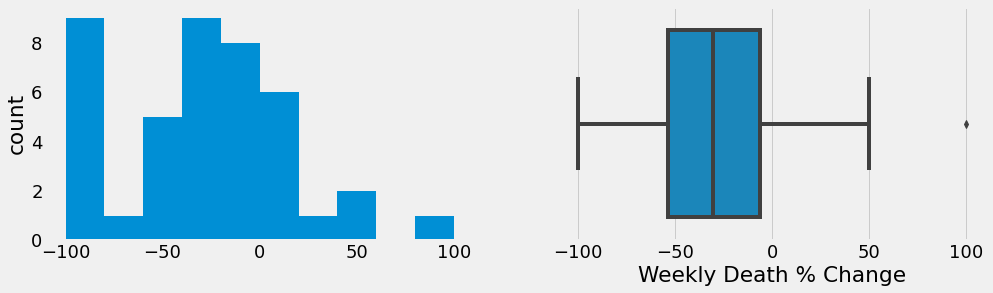

Deaths in the last 7 days/1M pop
Skew : 2.35


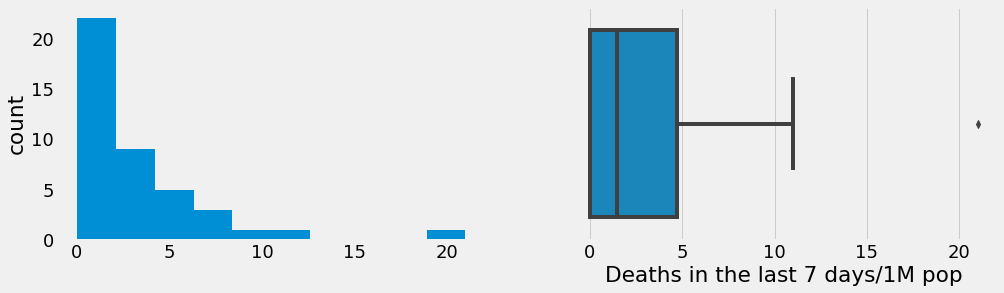

Population
Skew : 2.72


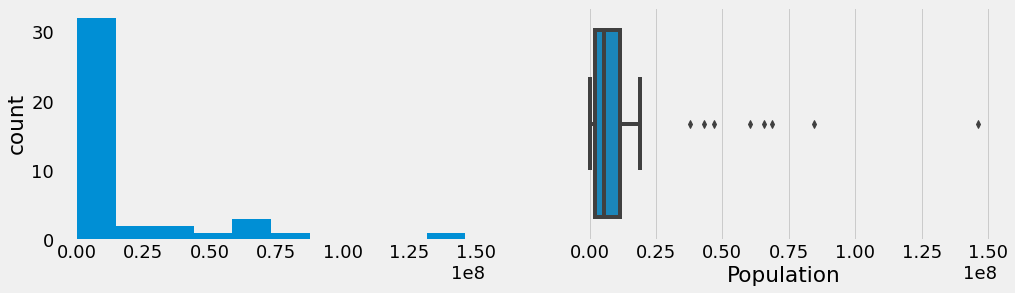

In [64]:
for col in data.columns[1:]:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

Observations: 
   
    - Most of the variables have skewed distributions.
    - The distribution for Weekly Case % Change is slightly skewed to the left.
    - The distribution for all other variables is highly skewed to the right. All these variable have some outliers to the 
    right end.

## Correlation among the variables

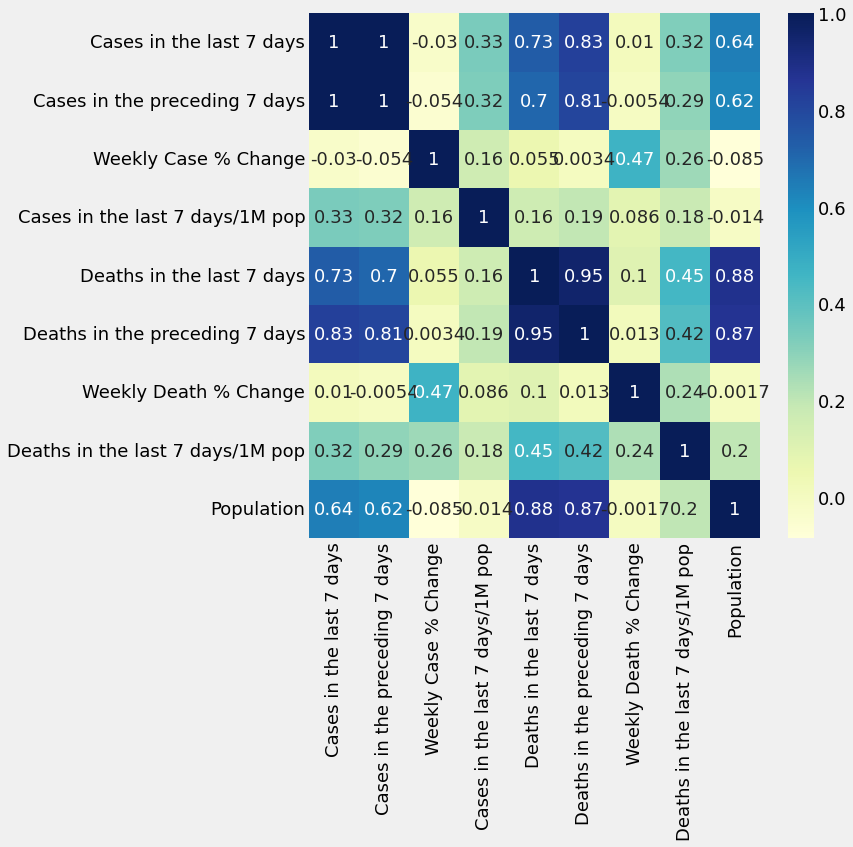

In [65]:
plt.figure(figsize  = (9,9))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

Observations:

    - There is a strong positive correlation between:
        1. Deaths (pre 7 days) and Cases (last 7 days)
        2. Cases (pre 7 days) and Deaths (pre 7 days)
        3. Cases (pre 7 days) and Cases (last 7 days)
        4. Deaths (pre 7 days) and Deaths (last 7 days)
        5. Population and Deaths (last 7 days)
        6. Population and Deaths (pre 7 days)
     - There are no strong negative correlations.

## Scaling the data

In [66]:
covid_new = data.drop(columns = ["Country/Other"])

In [67]:
#Scaling the data and storing the output as a new dataframe
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(covid_new), columns=covid_new.columns)

data_scaled.head()

,Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population
0,-0.399839,-0.390479,0.303934,-0.870169,-0.496496,-0.541939,0.726751,-0.788379,-0.496478
1,-0.397432,-0.387810,-0.026023,2.907850,-0.496496,-0.541939,0.726751,-0.788379,-0.592389
2,-0.049790,-0.052199,-0.108513,0.590826,-0.172617,0.845782,-1.123160,0.698683,-0.282553
3,-0.306882,-0.116320,-2.129504,-0.611692,-0.390613,-0.288774,-0.829882,-0.540535,-0.193949
4,-0.401655,-0.392087,0.345179,-0.900742,-0.484039,-0.523186,-0.401244,-0.639672,-0.483774


In [68]:
#Creating copy of the data to store labels from each algorithm
data_scaled_copy = data_scaled.copy(deep=True)

## K-Means Clustering

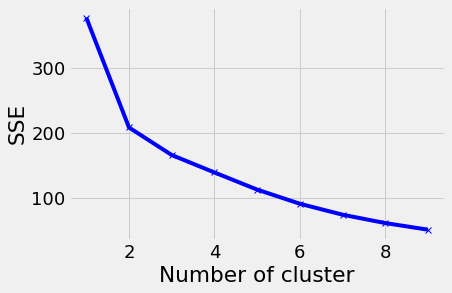

In [69]:
#Empty dictionary to store the SSE for each value of k
sse = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and 
# store the inertia value for that k 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    sse[k] = kmeans.inertia_

#Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Observations:
    
    - There is a consistent dip from 2 to 9 meaning we may choose any from this range to use as our # of clusters.

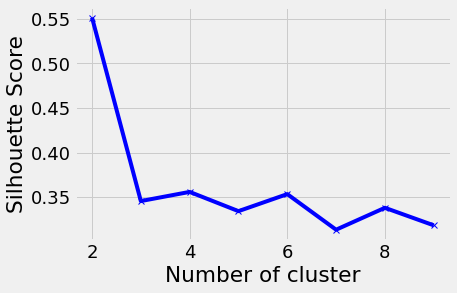

In [70]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k 
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sc[k] = silhouette_score(data_scaled, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

Observations:
    
    - We can see from the plot that silhouette score is highest for k = 2. We must start with first understanding 
    these 2 clusters.

In [71]:
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(data_scaled)

#Adding predicted labels to the original data and scaled data 
data_scaled_copy['KMeans_Labels'] = kmeans.predict(data_scaled)
data['KMeans_Labels'] = kmeans.predict(data_scaled)

In [72]:
data['KMeans_Labels'].value_counts()

1    36
0     6
Name: KMeans_Labels, dtype: int64

Observations:
    
    - This seems to be a very skewed cluster with a minimal amount of observations in one cluster and more than 30 
    in another.

In [73]:
#Calculating mean and median of the original data for each label
mean = data.groupby('KMeans_Labels').mean()
median = data.groupby('KMeans_Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_0 Median', 'group_1 Median']
df_kmeans

,Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population
group_0 Mean,103528.666667,139186.166667,-21.833333,1530.333333,453.166667,611.833333,-25.166667,6.333333,78590748.5
group_1 Mean,2773.833333,3733.750000,-22.458333,930.583333,17.472222,32.888889,-33.388889,2.655556,7127252.5
group_0 Median,103378.000000,136662.500000,-23.500000,1828.000000,426.000000,671.000000,-21.000000,6.000000,67057260.5
group_1 Median,1107.500000,1643.500000,-16.000000,462.500000,7.000000,11.500000,-33.000000,1.000000,4549974.0


Observations:
    
    - It seems that group 0 is of very high amounts of cases and population while group 1 is showcasing low amounts of cases.

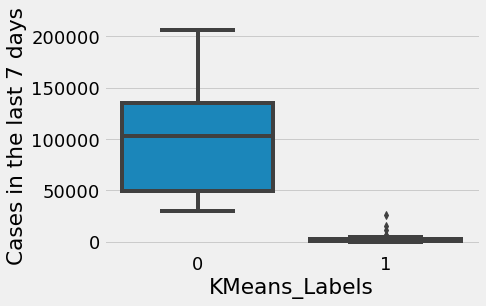

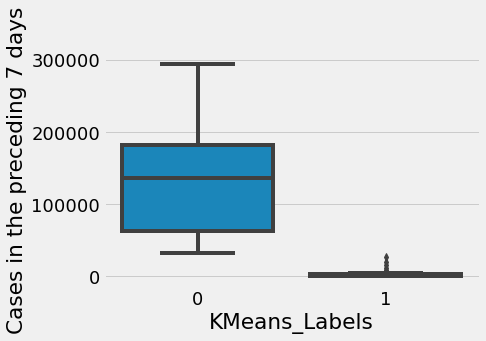

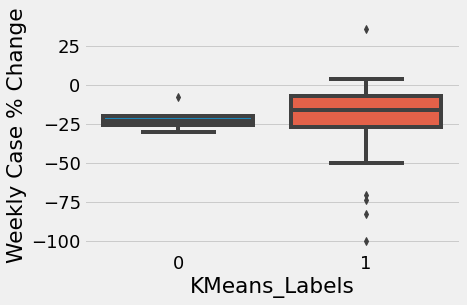

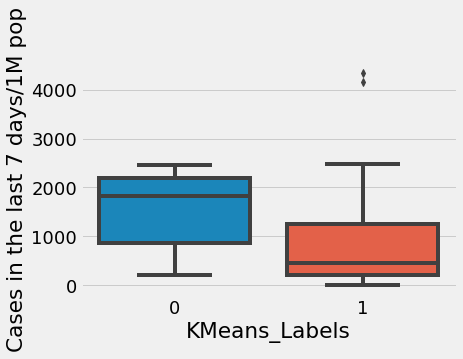

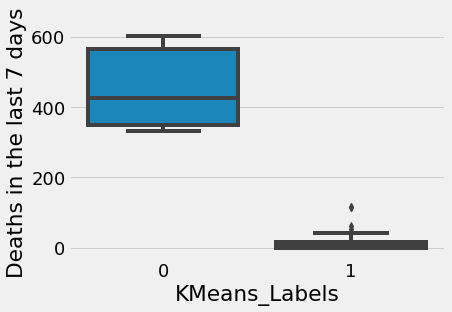

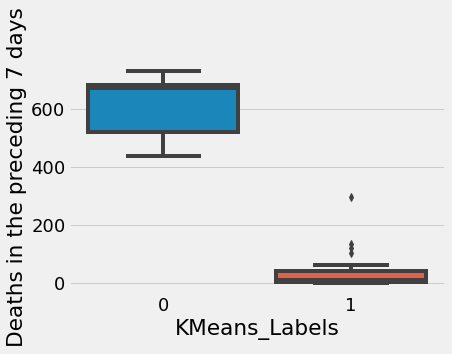

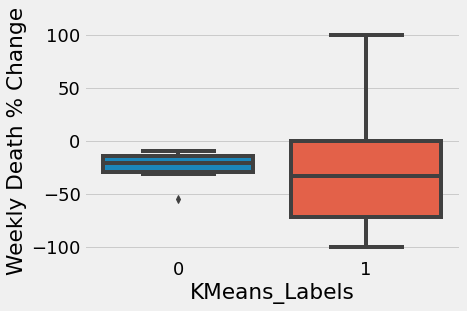

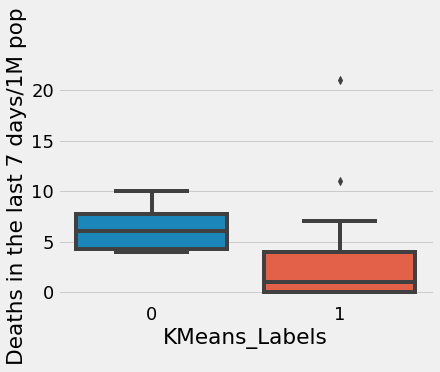

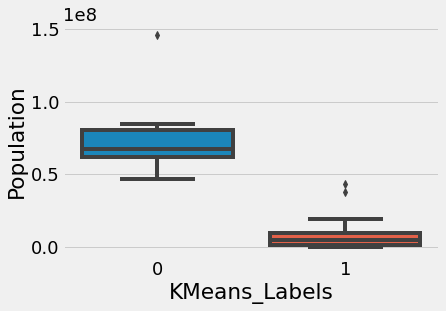

In [74]:
cols_visualise = ['Cases in the last 7 days', 'Cases in the preceding 7 days', 'Weekly Case % Change', 'Cases in the last 7 days/1M pop', 'Deaths in the last 7 days', 'Deaths in the preceding 7 days', 'Weekly Death % Change', 'Deaths in the last 7 days/1M pop', 'Population']

for col in cols_visualise:
    sns.boxplot(x = 'KMeans_Labels', y = col, data = data)
    plt.show()

Cluster Profiles:

    - Cluster 1 has only 6 observations. As observed from scatter plots and boxplots, group 1 consists of outlier countries with the lowest amounts of cases and deaths. 
    - Cluster 0 has 36 observations. As observed from scatter plots and boxplots, group 0 consists of countries with various amounts of cases adnd deaths.
    - Due to dissimiliarity, the ideal cluster is not observed as the makeup of this cluster is filled with a mix of many different types of countries. 
    - To finish off, this clustering solution does give a decent insight on what potential clusters should be like regarding similar countries. It deems to not be useful as the outlier countries are impactful to the extent of having such a small cluster and one very big cluster among the rest.

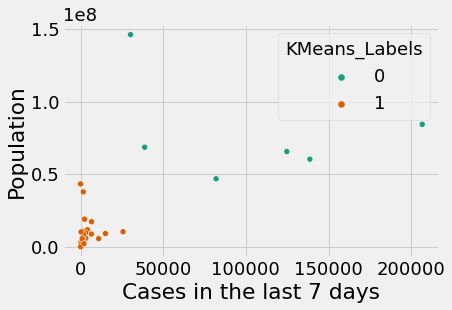

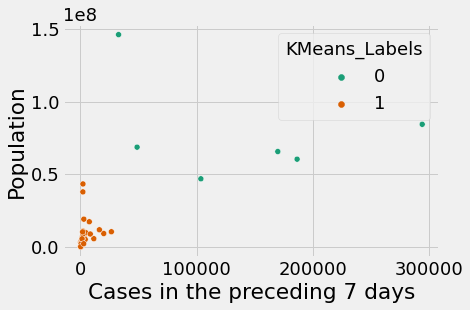

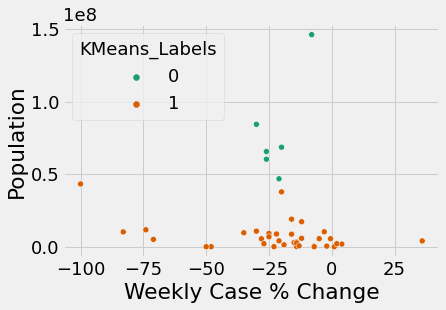

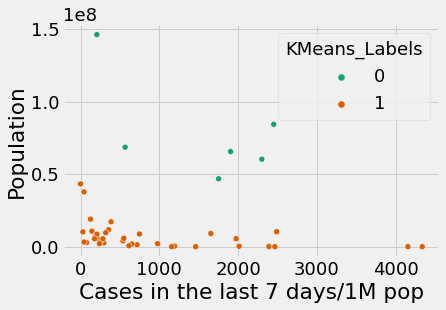

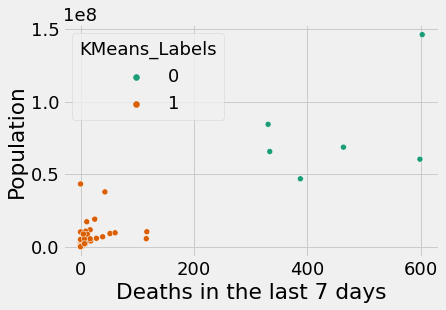

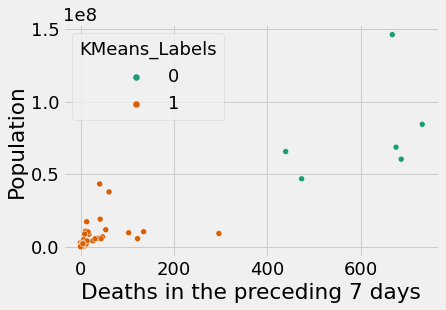

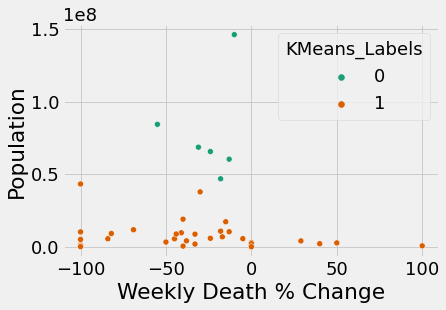

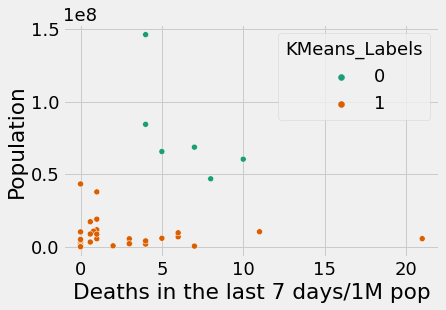

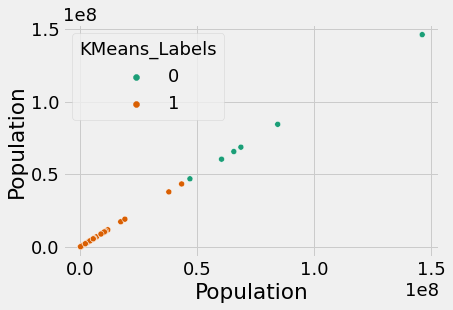

In [75]:
cols_visualise =  ['Cases in the last 7 days', 'Cases in the preceding 7 days', 'Weekly Case % Change', 'Cases in the last 7 days/1M pop', 'Deaths in the last 7 days', 'Deaths in the preceding 7 days', 'Weekly Death % Change', 'Deaths in the last 7 days/1M pop', 'Population']

for col in cols_visualise:
    sns.scatterplot(x = col, y = 'Population',data = data ,hue='KMeans_Labels', palette='Dark2')
    plt.show()

Observations:
    
    - Cluster 1 seems to be pretty concentrated in all diagrams while 
    Cluster 0 showcases little to no similar trajectory as if they are 
    all outliers. 

## Hierarchical Clustering

In [76]:
from scipy.cluster.hierarchy import dendrogram, linkage

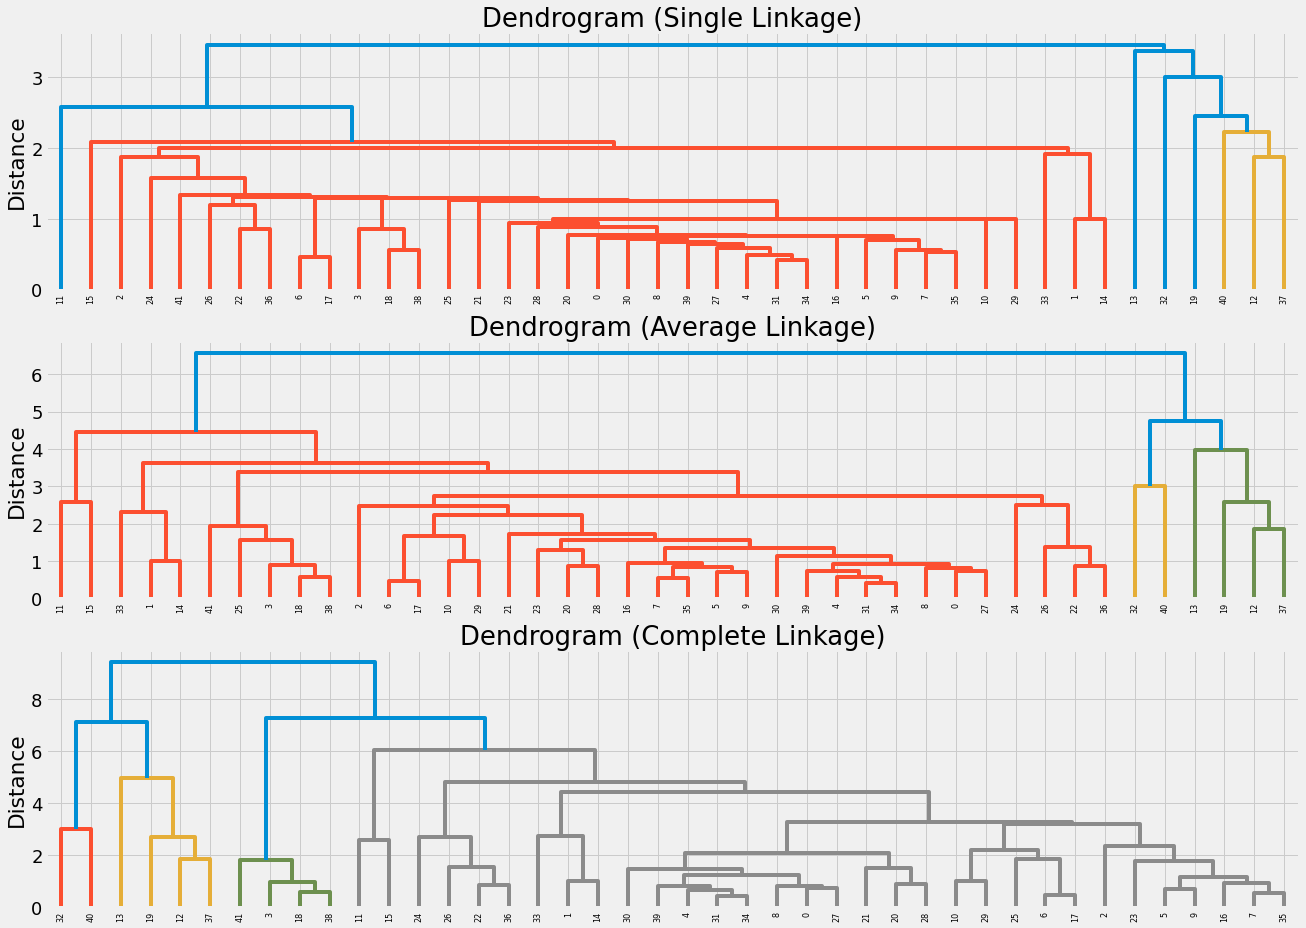

In [77]:
# List of all linkage methods to check
methods = ['single',
           'average', 
           'complete']

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize=(20, 15))

# Enumerate through the list of all methods above, get linkage and plot dendrogram
for i, method in enumerate(methods):
    Z = linkage(data_scaled, metric='euclidean', method=method)
    dendrogram(Z, ax=axs[i]);
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    axs[i].set_ylabel('Distance')

Observations:
    
    - We can see that complete linkage will mostly give better separated clusters. A cluster is necessarily better separated regarding vertical distance that connects any high clusters.
    - Here, we can choose to cut it at ~6 since the area between the two nodes are largest.

# Machine Learning Final (Section II)

In [78]:
import numpy as np
import pandas as pd

# Set random seed to ensure reproducible runs
RSEED = 100

Creating the features, x and labels, y. When there is only two features, it will allow for smooth visualization of the data.

In [79]:
X = np.array([[1, 2], 
              [2, 1],
              [1, 3], 
              [2, 2], 
              [1, 1],
              [3, 3],
              [2, 3]])

y = np.array([0, 1, 1, 1, 0, 1, 0])

## Data Visualization

Graphing the data points with the number showing each label.

Text(0.5, 1.0, 'Data')

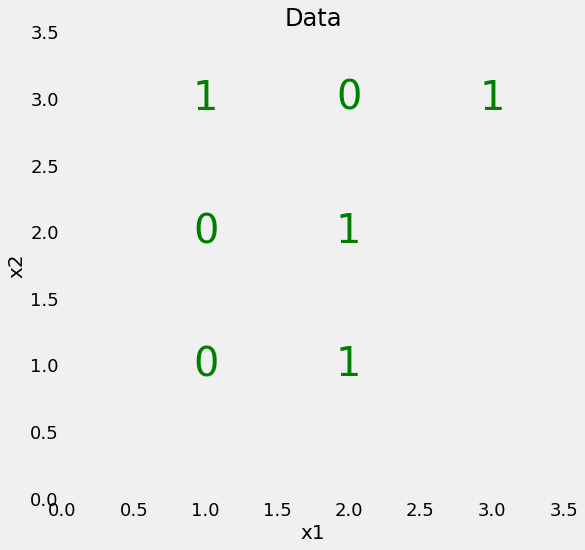

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.figure(figsize = (8, 8))

# Plot each point as the label
for x1, x2, label in zip(X[:, 0], X[:, 1], y):
    plt.text(x1, x2, str(label), fontsize = 40, color = 'g',
             ha='center', va='center')
    
# Plot formatting
plt.grid(None);
plt.xlim((0, 3.5));
plt.ylim((0, 3.5));
plt.xlabel('x1', size = 20); plt.ylabel('x2', size = 20); plt.title('Data', size = 24)

With this problem having two features, this is defined as a linearly inseparable problem. Separating the classes will not be capable with a simple linear classifier as it will not be able to draw a boundary. Utilizing the single decision tree, it will be capable of drawing multiple linear boundaries when connecting the points. It is of note that a decision tree is a non-parametric model because as the size of the data becomes larger, the number of parameters does also. 

# Single Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
tree = DecisionTreeClassifier(random_state=RSEED)
model_tree=tree.fit(X, y)

In [82]:
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 9 nodes with maximum depth 3.


The decision tree has formed 9 nodes which have reached a maximum depth of 3. Regarding this information, the training data set will have 100% accuracy as there were no limits to the depth.

In [83]:
print(f'Model Accuracy: {tree.score(X, y)}')

Model Accuracy: 1.0


## Visualize Decision Tree

Understanding how the tree 'thinks', it will be necessary to visualize the tree itself. Once visualizing the tree, one will be able to understand the entire structure and the decisions being made. When showing each separate node, there will be ease making new predictions.

In [84]:
from sklearn import tree

[Text(0.4444444444444444, 0.875, 'X[0] <= 1.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.2222222222222222, 0.625, 'X[1] <= 2.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.625, 'X[1] <= 2.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7777777777777778, 0.375, 'X[0] <= 2.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

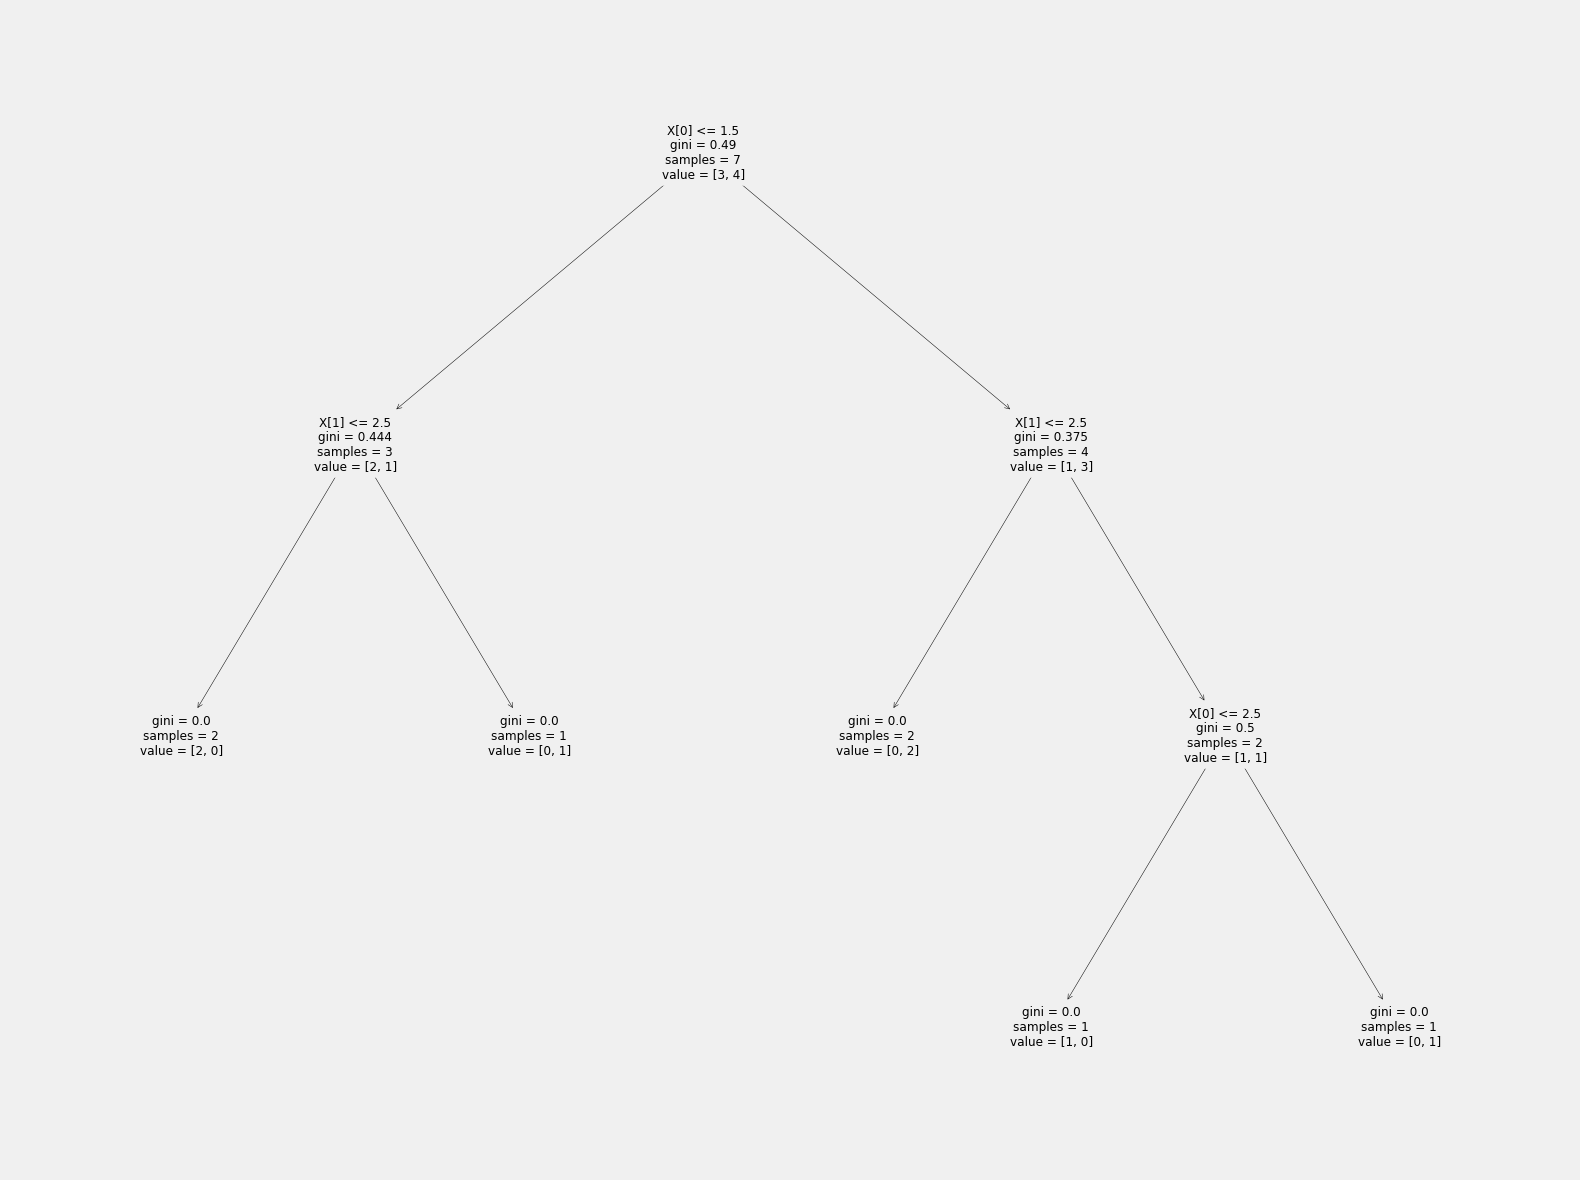

In [85]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(model_tree, fontsize=12)

Above image is the entire tree.

+ Definitions from class material:

A decision tree is an intuitive model: it makes decisions much as we might when faced with a problem by constructing a flowchart of questions. For each of the nodes (except the leaf nodes), the five rows represent:

Question asked about the data based on a feature: this determines the way we traverse down the tree for a new datapoint.
1. gini: the Gini Impurity of the node. The average (weighted by samples) gini impurity decreases with each level of the tree.
2. samples: number of training observations in the node
3. value: [number of samples in the first class, number of samples in the second class]
4. class: the class predicted for all the points in the node if the tree ended at this depth (defaults to 0 for a tie).

The leaf nodes (the terminal nodes at each branch) do not have a question because they are where the tree makes a prediction. All of the samples in a leaf node are assigned the same class.

## Gini Impurity

The Gini Impurity represents the probability that a randomly selected sample from the node will be incorrectly classified according to the distribution of samples in the node. At the highest node, there is a 49% chance that a randomly selected point would be incorrectly classified. The sense of Gini Impurity is impactful on how the decision tree will perform its splits. 

At the final points of the tree, the average Gini Impurity will become 0.0 as each point is correctly classified. 

## Limit Maxium Depth

When limiting maximum depth, the tree will be capable of adhering to testing data and its performance while have a lesser model accuracy. 

In [86]:
# Limit maximum depth and train
short_tree = DecisionTreeClassifier(max_depth = 2, random_state=RSEED)
short_tree.fit(X, y)

print(f'Model Accuracy: {short_tree.score(X, y)}')

Model Accuracy: 0.8571428571428571


Visualizing the entire decision tree (limiting maximum depth)

[Text(0.5, 0.8333333333333334, 'X[0] <= 1.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.25, 0.5, 'X[1] <= 2.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5, 'X[1] <= 2.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]')]

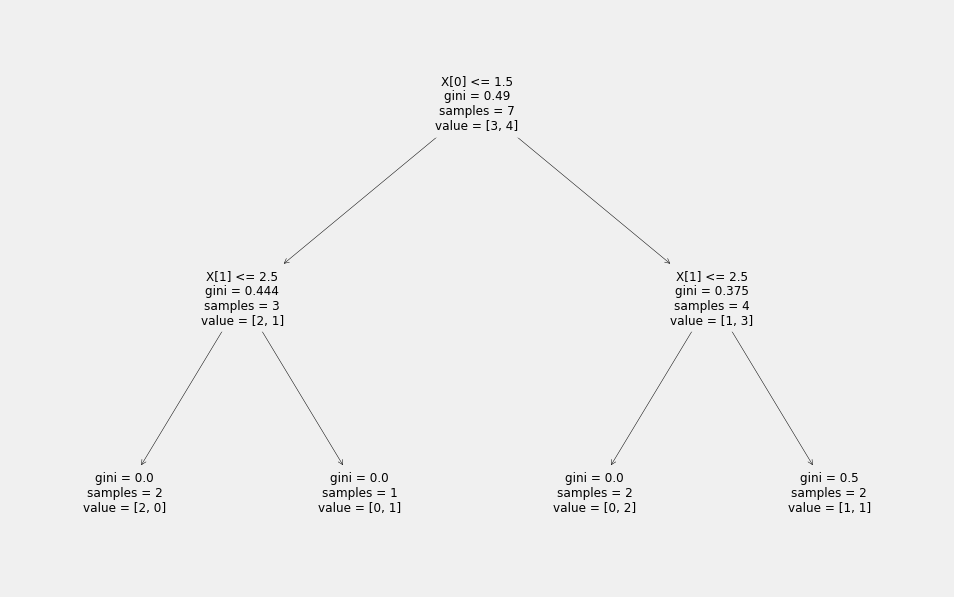

In [87]:
fig2 = plt.figure(figsize=(15,10))
tree.plot_tree(short_tree, fontsize=12)

As aforementioned the model accuracy on the training data will not be 100% any longer. However, the testing data's performance will improve when limiting the maxium depth to prevent overfitting issues. Variance tradeoff, this property in relation to a model, the variance of the parameter estimated across samples can be reduced by increasing the bias in the estimated parameters. This tradeoff impacts both the training data and testing data. High variance will insinuate the model has learned the training data well but will suffer generalizing new points in the test set. High bias will insinuate the model has not learned the training data well because it is not complex enough. 

## Behavioral Risk Factor Surveillance System 

The objective of the BRFSS is to collect uniform, state-specific data on preventive health practices and risk
behaviors that are linked to chronic diseases, injuries, and preventable infectious diseases in the adult population.

The data set is from the Centers for Disease Control and Prevention (CDC) and includes socioeconomic and lifestyle indicators for hundreds of thousands of individuals. The objective is to predict the overall health of an individual: either 0 for poor health or 1 for good health. We'll limit the data to 5,000 individuals.

## Data Cleaning

In [111]:
df = pd.read_csv('2015.csv').sample(5000, random_state = RSEED)
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
59442,9.0,4.0,b'04062015',b'04',b'06',b'2015',1100.0,2.015008e+09,2.015008e+09,NaN,...,3.0,2.0,3.0,3.0,4.0,1.0,2.0,NaN,NaN,2.0
295595,38.0,9.0,b'09112015',b'09',b'11',b'2015',1100.0,2.015002e+09,2.015002e+09,1.0,...,4.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
382864,49.0,4.0,b'05202015',b'05',b'20',b'2015',1100.0,2.015009e+09,2.015009e+09,NaN,...,1.0,1.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
440752,72.0,9.0,b'10262015',b'10',b'26',b'2015',1100.0,2.015005e+09,2.015005e+09,NaN,...,4.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0
23981,5.0,5.0,b'05242015',b'05',b'24',b'2015',1200.0,2.015004e+09,2.015004e+09,NaN,...,9.0,9.0,3.0,3.0,4.0,9.0,9.0,9.0,9.0,NaN


In [112]:
# Getting rid of infinite and null values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999, inplace=True)

In [113]:
df = df.select_dtypes('number')

## Label Distribution

In [114]:
df['_RFHLTH'] = df['_RFHLTH'].replace({2: 0})
df = df.loc[df['_RFHLTH'].isin([0, 1])].copy()
df = df.rename(columns = {'_RFHLTH': 'label'})
df['label'].value_counts()

1.0    4050
0.0     930
Name: label, dtype: int64

As there is label imbalanced means that accuracy will not be the best metric.

In [115]:
# Remove columns with missing values
df = df.drop(columns = ['POORHLTH', 'PHYSHLTH', 'GENHLTH', 'PAINACT2', 
                        'QLMENTL2', 'QLSTRES2', 'QLHLTH2', 'HLTHPLN1', 'MENTHLTH'])

## Splitting the Data (Training and Testing Set)

Assessing predictions will require both, the training and testing set. The model will learn from the training data which will translate to making predictions on the testing data.

We'll save 25% of the examples for testing.

In [116]:
from sklearn.model_selection import train_test_split

# Extract the labels
labels = np.array(df.pop('label'))

# 25% examples in test data
train, test, train_labels, test_labels = train_test_split(df, labels, 
                                                          stratify = labels,
                                                          test_size = 0.25, 
                                                          random_state = RSEED)

Imputation of Missing values

We'll fill in the missing values with the mean of the column. It's important to note that we fill in missing values in the test set with the mean of columns in the training data. This is necessary because if we get new data, we'll have to use the training data to fill in any missing values.

In [117]:
train = train.fillna(train.mean())
test = test.fillna(test.mean())

# Features for feature importances
features = list(train.columns)

In [118]:
train.shape

(3735, 313)

In [119]:
test.shape

(1245, 313)

## Decision Tree (CDC Data)

In [120]:
# Train tree
tree = DecisionTreeClassifier(random_state=RSEED)

tree.fit(train, train_labels)
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 673 nodes with maximum depth 24.


## Assess Decision Tree Performance

In [121]:
# Make probability predictions
train_probs = tree.predict_proba(train)[:, 1]
probs = tree.predict_proba(test)[:, 1]

train_predictions = tree.predict(train)
predictions = tree.predict(test)

In [122]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(test_labels, probs)}')

Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.6506874586506981


In [123]:
print(f'Baseline ROC AUC: {roc_auc_score(test_labels, [1 for _ in range(len(test_labels))])}')

Baseline ROC AUC: 0.5


1. The Test ROC AUC Score of .65 (which is greater than the baseline of 0.5) indicates it does outperform a baseline guess.
2. The Train ROC AUC Score of 1.0 indicates it is severely overfit.

## Evaluating the Decision Tree

- Calculate a number of metrics which are necessary for the baseline, test predictions and training predictions.
- This function will allow the ROC curves to be plotted.

In [124]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');


In [125]:
from collections import Counter
print(Counter(probs))
print(Counter(predictions))

Counter({1.0: 1021, 0.0: 224})
Counter({1.0: 1021, 0.0: 224})


Recall Baseline: 1.0 Test: 0.88 Train: 1.0
Precision Baseline: 0.81 Test: 0.87 Train: 1.0
Roc Baseline: 0.5 Test: 0.65 Train: 1.0


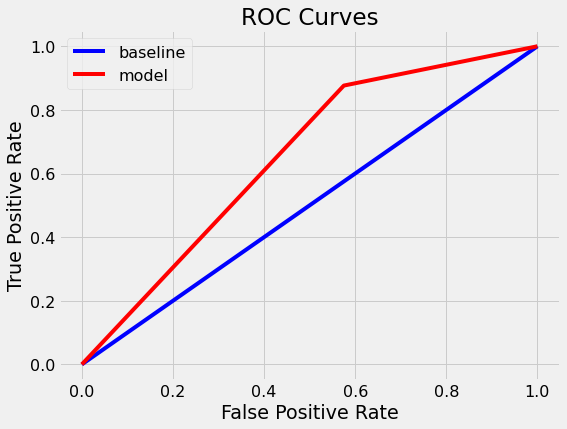

In [126]:
evaluate_model(predictions, probs, train_predictions, train_probs)

The ROC Curve showcases the severe overfitting to the training data.

## Confusion Matrix 

In [127]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[ 99 134]
 [125 887]]


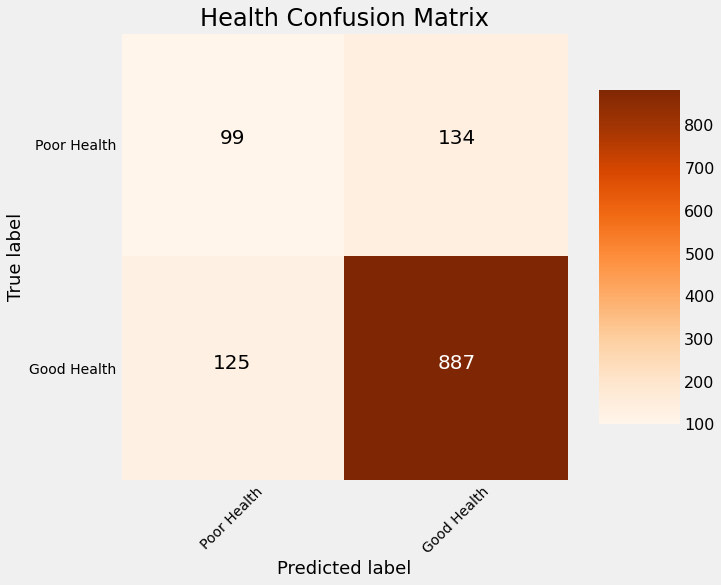

In [128]:
cm = confusion_matrix(test_labels, predictions)
plot_confusion_matrix(cm, classes = ['Poor Health', 'Good Health'],
                      title = 'Health Confusion Matrix')

The results of this confusion matrix is showcasing that our model is having many false negatives for good health when the individual is actually of poor health and many false positives for poor health when the individual is actually of good health. 

## Feature Importance

In [129]:
fi = pd.DataFrame({'feature': features,
                   'importance': tree.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head()

,feature,importance
62,DIFFWALK,0.194338
58,QLACTLM2,0.025883
3,SEQNO,0.025296
64,DIFFALON,0.021855
37,CHCCOPD1,0.021666


Definition of each feature:
1. DIFFWALK - Difficulty Walking or Climbing Stairs
2. QLACTLM2 - Activity Limitation Due to Health Problems
3. SEQNO - Annual Sequence Number
4. DIFFALON - Difficuly Doing Errands Alone
5. CHCCOPD1 - Ever told) you have chronic obstructive pulmonary disease, emphysema or chronic bronchitis? 

## Visualize Decision Tree 

[Text(0.5, 0.9, 'DIFFWALK <= 1.5\ngini = 0.304\nsamples = 3735\nvalue = [697, 3038]'),
 Text(0.25, 0.7, 'DIFFALON <= 1.5\ngini = 0.49\nsamples = 619\nvalue = [353, 266]'),
 Text(0.125, 0.5, 'CHCCOPD1 <= 1.5\ngini = 0.385\nsamples = 219\nvalue = [162, 57]'),
 Text(0.0625, 0.3, '_RAWRAKE <= 4.0\ngini = 0.187\nsamples = 67\nvalue = [60, 7]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, '_EDUCAG <= 3.5\ngini = 0.441\nsamples = 152\nvalue = [102, 50]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'ARTHSOCL <= 1.5\ngini = 0.499\nsamples = 400\nvalue = [191, 209]'),
 Text(0.3125, 0.3, 'BEANDAY_ <= 46.5\ngini = 0.41\nsamples = 73\nvalue = [52, 21]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, '_MICHD <= 1.5\ngini = 0.489\nsamples = 327\nvalue = [139, 188]'),
 Text(0.40625, 0.1, '\n  (...)  \n'),
 Text(0.46875, 0.1, '\n  (...)  \n'),
 Text(0.75

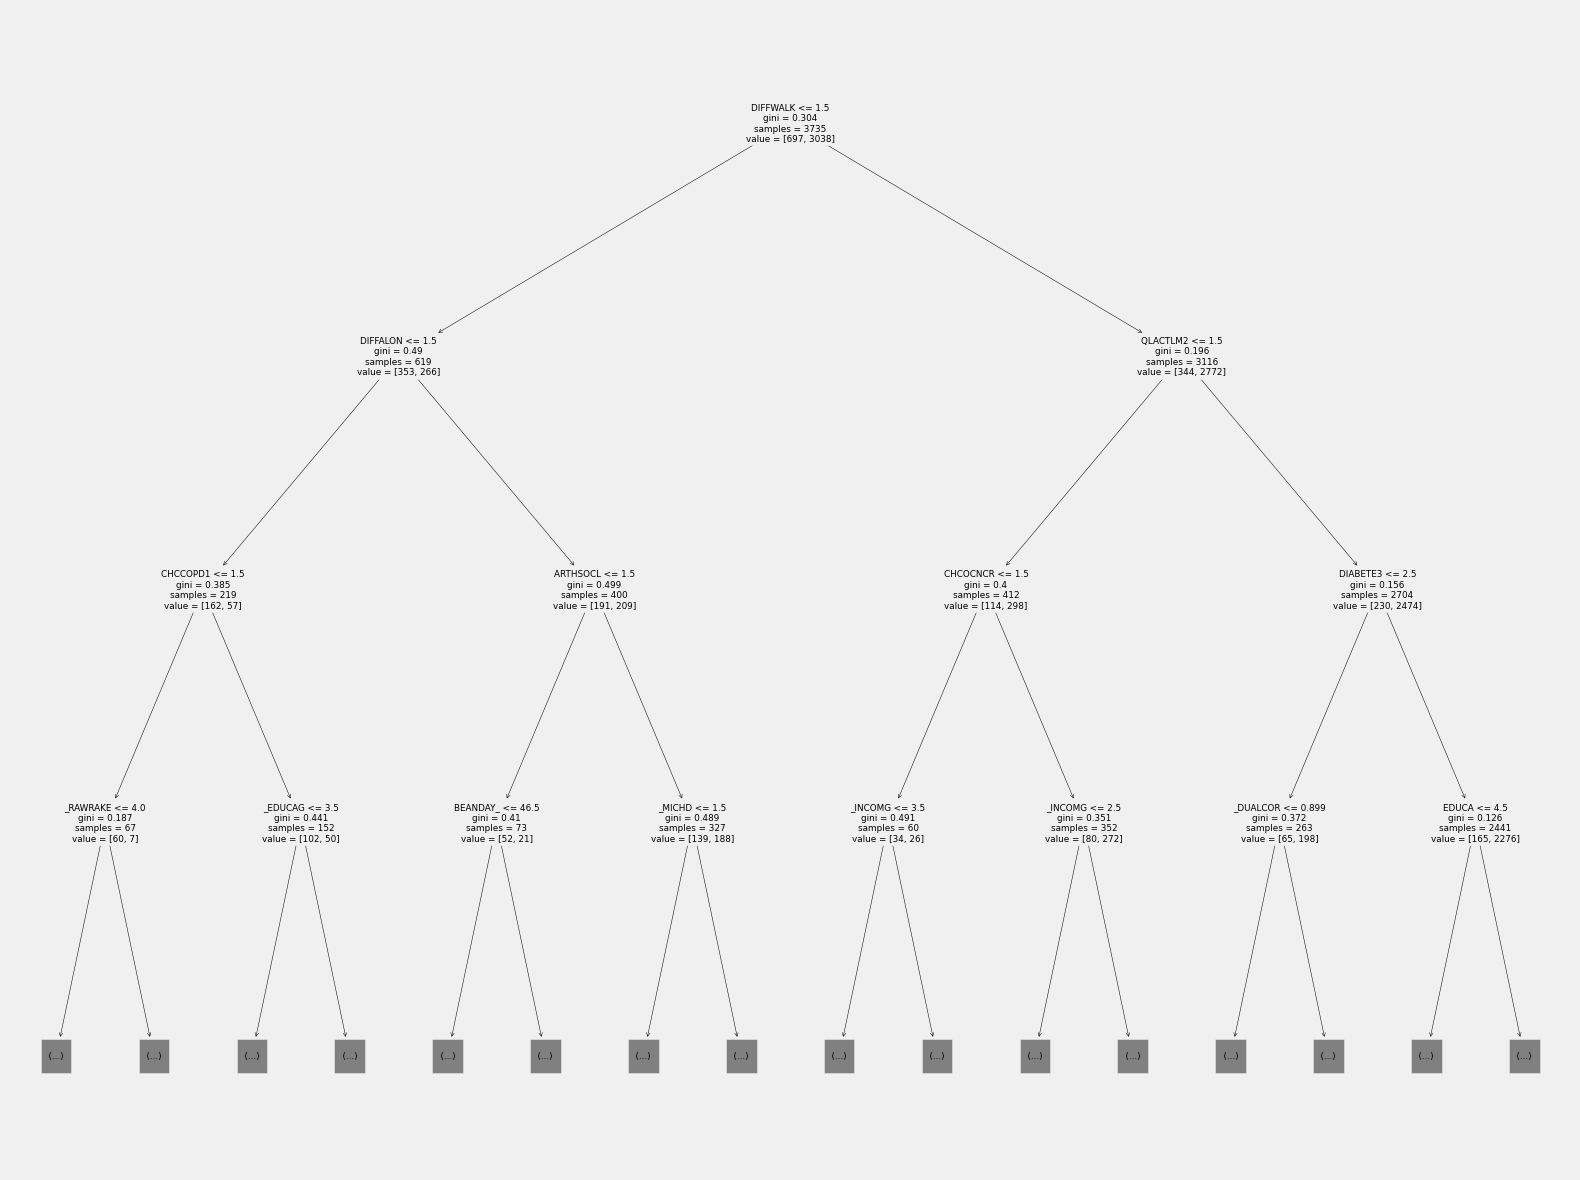

In [130]:
import subprocess
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from PIL import Image
#from subprocess import check_call
# Save tree as dot file
#export_graphviz(tree, 'tree_real_data.dot', rounded = True, 
#                feature_names = features, max_depth = 6,
#                class_names = ['poor health', 'good health'], filled = True)

# Convert to png
#subprocess.call(['dot', '-Tpng', 'tree_real_data.dot', '-o', 'tree_real_data.png', '-Gdpi=200'])

#tree.export_graphviz(model_name,'m1_ent.dot',filled=True,feature_names=features,
#                     class_names= classes)

#convert dot into image
#subprocess.check_call(['dot','-Tpng','tree_real_data.dot','-0','tree_real_data.png'])

# Visualize
#Image(filename='tree_real_data.png')
fig = plt.figure(figsize=(25,20))
plot_tree(tree, max_depth=3, feature_names = features)


It is evident that the model at hand has many nodes. As forementioned, we could limit the maximum depth to reduce some variance to our model. 

## Random Forest

Random Forest is like a single decision tree, but it is much more powerful and creates an ensemble model out of multiple trees to reduce the variance that may plague our model. 

In [131]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=100,
                       verbose=1)

In [132]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 760
Average maximum depth 22


## Random Forest Results

In [133]:
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


Recall Baseline: 1.0 Test: 0.97 Train: 1.0
Precision Baseline: 0.81 Test: 0.87 Train: 1.0
Roc Baseline: 0.5 Test: 0.88 Train: 1.0


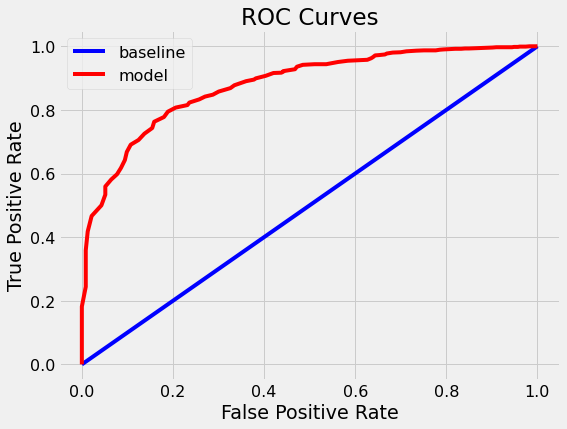

In [134]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

The training data still has perfect 1:1 ratio with the model. Comparing to the single decision tree and its ROC Curve, the random forest's ROC Curve does much better for the testing data.

Confusion matrix, without normalization
[[ 84 149]
 [ 34 978]]


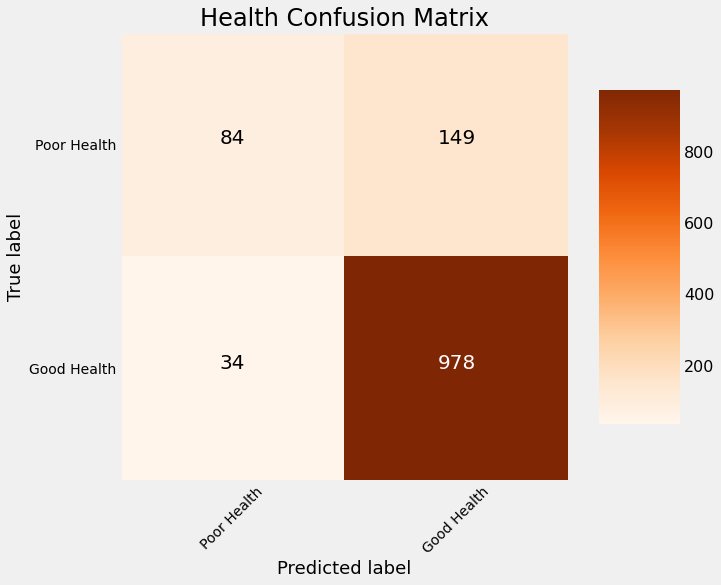

In [135]:
cm = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm, classes = ['Poor Health', 'Good Health'],
                      title = 'Health Confusion Matrix')

Comparing the confusion matrix from the single decision tree results, the model now has fewer false positives but has incurred more false negatives. This means the random forest is outperforming the single decision tree.

In [136]:
fi_model = pd.DataFrame({'feature': features,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10)

,feature,importance
62,DIFFWALK,0.039198
59,USEEQUIP,0.020886
64,DIFFALON,0.018761
307,_LMTSCL1,0.018460
90,ARTHSOCL,0.017688
58,QLACTLM2,0.016132
51,EMPLOY1,0.014885
61,DECIDE,0.013581
53,INCOME2,0.013218
211,_STSTR,0.013010


Comparing the feature importance from the single decision tree results, the current model is more capable of generalizing to new data which is significant.

## Random Forest Optimization through Random Search

This sort of optimization for the random forest will allow for superior hyperparameters. This will allow for maximum performance by returning the values which perform the best.

In [138]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=RSEED)

# Fit 
rs.fit(train, train_labels)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                    

We must tune the model for this specific dataset to achieve the best hyperparameters. 

In [139]:
rs.best_params_

{'n_estimators': 188,
 'min_samples_split': 5,
 'max_leaf_nodes': 46,
 'max_features': 'auto',
 'max_depth': 15,
 'bootstrap': False}

## Identifying the Best Model

In [140]:
best_model = rs.best_estimator_

In [141]:
train_rf_predictions = best_model.predict(train)
train_rf_probs = best_model.predict_proba(train)[:, 1]

rf_predictions = best_model.predict(test)
rf_probs = best_model.predict_proba(test)[:, 1]

In [142]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 91
Average maximum depth 10


The average number of nodes and average maximum depth has drastically decreased from the original amount of 760 and 22, respectively. 
Restricting the maximum depth has proven to be effective once again, but this case of involves the individual decision trees being impacted. It has improved the cross validation performance of the random forest which is ideal.

Recall Baseline: 1.0 Test: 0.97 Train: 0.99
Precision Baseline: 0.81 Test: 0.86 Train: 0.89
Roc Baseline: 0.5 Test: 0.88 Train: 0.93


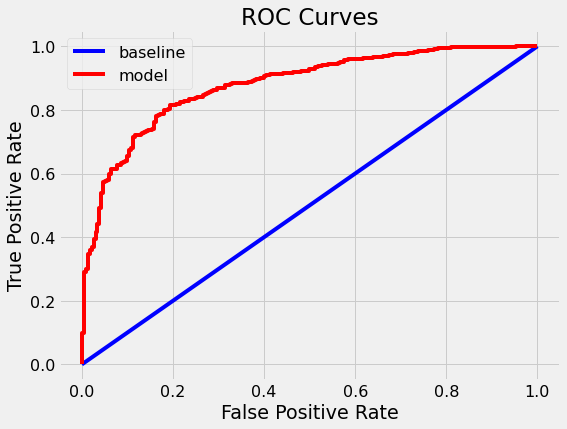

In [143]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

Our model is now optimized, but still performs similar to the original model. The training data is no longer having perfect measures with our model. The threshold for improvement may have been reached for this specific problem and what random forests can offer, or additional iterations could improve the performance. 

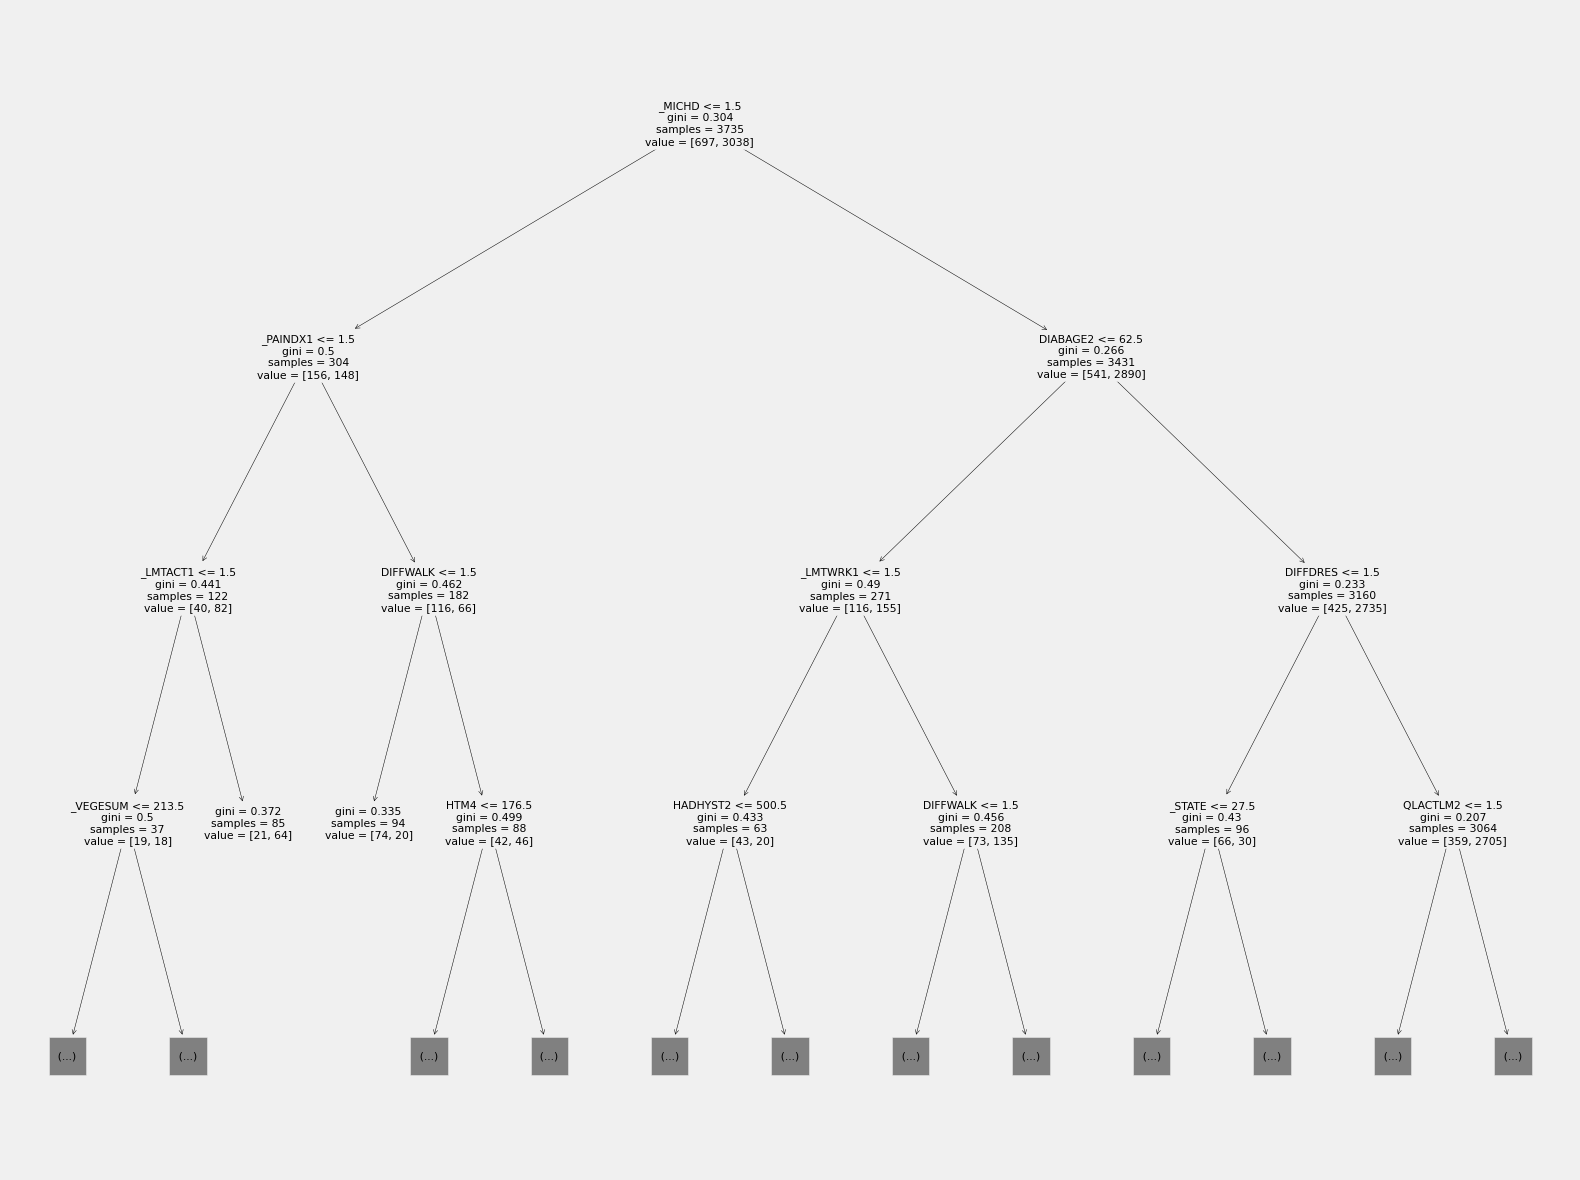

In [144]:
from sklearn import tree
estimator = best_model.estimators_[1]

fig = plt.figure(figsize=(25,20))
tree.plot_tree(estimator, max_depth=3, feature_names = features)
fig.savefig("tree_estimator.png")

This decision tree compared to the previous one, is a bit simpler. Utilizing random search has identified that when maximizing depth, the best performance is seen when the tree is not expanding every decision which creates more nodes.

## Conclusion

- The model was performed as default and compared to a baseline. We were able to identify the overall health of individuals.
- To triumph over a single decision tree limitations, one can train multiple (100s, 1000s, 10000s) of them in a single ensemble model to achieve less variance and better performance. This is known as a random forest.
- The final model - a hyperparameter-tuned classifier, is overfitting on the training dataset but results in the best performance for the training and testing data. Further iterations may allow for a superior-tuned model, but CDC can use this current model to predict whether one is of good health and poor health. 